In [11]:
from daphne import daphne
import os, json
import numpy as np
import torch
from torch import tensor
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
def ast_helper(fname,directory):
    sugared_fname = '../prob_prog/hw/hw6/CS532-HW6/{}/{}'.format(directory,fname)
    desugared_ast_json_fname = '/Users/gw/repos/prob_prog/' + sugared_fname.replace('.daphne','.json')
    if os.path.isfile(desugared_ast_json_fname):
        with open(desugared_ast_json_fname) as f:
            ast = json.load(f)
    else:
        #note: the sugared path that goes into daphne desugar should be with respect to the daphne path!
        ast = daphne(['desugar-hoppl-cps', '-i', sugared_fname]) 

        with open(desugared_ast_json_fname, 'w') as f:
            json.dump(ast, f)
    return ast

i=4
fname = '{}.daphne'.format(i)
exp = ast_helper(fname,directory='programs')
%cat programs/4.daphne

(let [mu (sample (normal 1 (sqrt 5)))
           sigma (sqrt 2)
           lik (normal mu sigma)]
       (observe lik 8)
       (observe lik 9)
       mu)

In [35]:
import smc
import importlib
importlib.reload(smc)

<module 'smc' from '/Users/gw/repos/prob_prog/hw/hw6/CS532-HW6/smc.py'>

In SMC step 0, Zs:  []
In SMC step 1, Zs:  [-5.426987590543291]
In SMC step 2, Zs:  [-5.426987590543291, -7.7169570978697495]
In SMC step 0, Zs:  []
In SMC step 1, Zs:  [-4.409021968208568]
In SMC step 2, Zs:  [-4.409021968208568, -3.281747838494585]
In SMC step 0, Zs:  []
In SMC step 1, Zs:  [-5.44325713520603]
In SMC step 2, Zs:  [-5.44325713520603, -2.7813596798573204]
In SMC step 0, Zs:  []
In SMC step 1, Zs:  [-5.348063793569588]
In SMC step 2, Zs:  [-5.348063793569588, -3.34402504427412]
In SMC step 0, Zs:  []
In SMC step 1, Zs:  [-5.384503472706044]
In SMC step 2, Zs:  [-5.384503472706044, -2.8596724029796277]
In SMC step 0, Zs:  []
In SMC step 1, Zs:  [-5.406247981671558]
In SMC step 2, Zs:  [-5.406247981671558, -2.857562885985456]


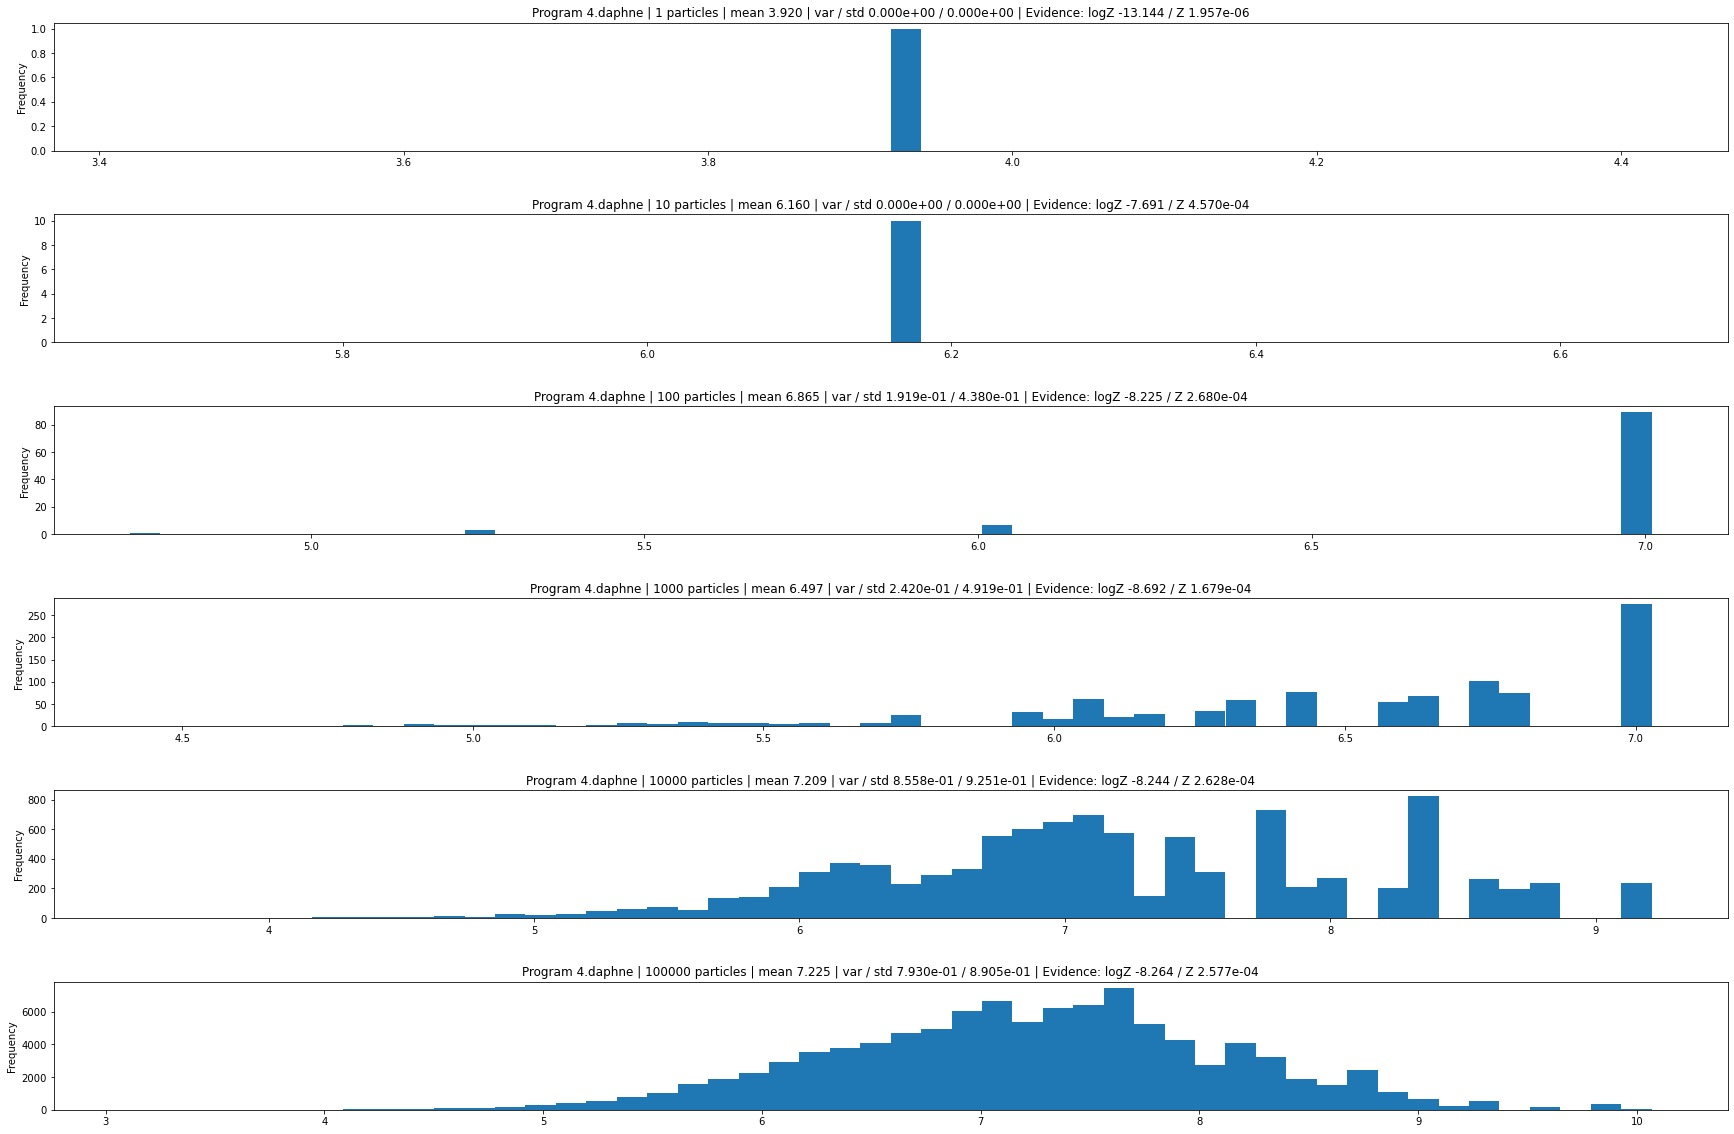

In [45]:
particle_counts = [1,10,100,1000,10000,100000]
fig, axes = plt.subplots(nrows=len(particle_counts),figsize=(30,20))
# fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5) # https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib


for idx, n_particles in enumerate(particle_counts):
    logZ, particles = smc.SMC(n_particles, exp)
    samples_array = np.array([sample.item() for sample in particles])
    mean = samples_array.mean()
    var = samples_array.var()
    pd.Series(samples_array).plot.hist(ax=axes[idx], bins=50, title='Program {} | {} particles | mean {:1.3f} | var / std {:1.3e} / {:1.3e} | Evidence: logZ {:1.3f} / Z {:1.3e}'.format(fname, n_particles, mean, var, np.sqrt(var), logZ, np.exp(logZ) ))
